In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
#deaths_reported = pd.read_csv('Deaths_China.csv')
deaths_reported = pd.read_csv('/content/drive/MyDrive/dataset/Deaths.csv')

In [4]:
#recovered_cases = pd.read_csv('Recovered_China.csv')
recovered_cases = pd.read_csv('/content/drive/MyDrive/dataset/Recovered.csv')

In [5]:
confirmed_cases = pd.read_csv('/content/drive/MyDrive/dataset/Confirmed.csv')

In [6]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,7/26/2021,7/27/2021,7/28/2021,7/29/2021,7/30/2021,7/31/2021,8/1/2021,8/2/2021,8/3/2021,8/4/2021
0,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
1,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1086,1087,1088,1089,1089,1089,1095,1096,1096,1099
2,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,601,601,601,603,603,603,603,603,603,603
3,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,724,727,730,733,736,737,741,743,748,751
4,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,198,199,199,199,199,199,199,199,199,199


In [7]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '7/26/2021', '7/27/2021', '7/28/2021', '7/29/2021', '7/30/2021',
       '7/31/2021', '8/1/2021', '8/2/2021', '8/3/2021', '8/4/2021'],
      dtype='object', length=565)

In [8]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]



In [9]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]


In [10]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]


In [11]:
confirmed.head()


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,7/26/2021,7/27/2021,7/28/2021,7/29/2021,7/30/2021,7/31/2021,8/1/2021,8/2/2021,8/3/2021,8/4/2021
0,1,9,15,39,60,70,106,152,200,237,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
1,14,22,36,41,68,80,91,111,114,139,...,1086,1087,1088,1089,1089,1089,1095,1096,1096,1099
2,6,9,27,57,75,110,132,147,182,211,...,601,601,601,603,603,603,603,603,603,603
3,1,5,10,18,35,59,80,84,101,120,...,724,727,730,733,736,737,741,743,748,751
4,0,2,2,4,7,14,19,24,26,29,...,198,199,199,199,199,199,199,199,199,199


In [12]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = recoveries.keys()
china_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    china_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [13]:
confirmed_sum


105433

In [14]:
death_sum


4848

In [15]:
recovered_sum


99228

In [16]:
china_cases
#Every day confirmed cases

[548,
 643,
 920,
 1406,
 2075,
 2877,
 5509,
 6087,
 8141,
 9802,
 11891,
 16630,
 19716,
 23707,
 27440,
 30587,
 34110,
 36814,
 39829,
 42354,
 44386,
 44759,
 59895,
 66358,
 68413,
 70513,
 72434,
 74211,
 74619,
 75077,
 75550,
 77001,
 77022,
 77241,
 77754,
 78166,
 78600,
 78928,
 79356,
 79932,
 80136,
 80261,
 80386,
 80537,
 80690,
 80770,
 80823,
 80860,
 80887,
 80921,
 80932,
 80945,
 80977,
 81003,
 81033,
 81058,
 81102,
 81156,
 81250,
 81305,
 81435,
 81493,
 81587,
 81658,
 81781,
 81872,
 81964,
 82058,
 82139,
 82245,
 82333,
 82414,
 82497,
 82534,
 82594,
 82665,
 82718,
 82809,
 82883,
 82941,
 83014,
 83134,
 83213,
 83306,
 83355,
 83403,
 83760,
 83786,
 83805,
 83817,
 83853,
 83868,
 83884,
 83899,
 83909,
 83912,
 83918,
 83940,
 83944,
 83956,
 83959,
 83959,
 83964,
 83966,
 83968,
 83970,
 83975,
 83976,
 83990,
 84010,
 84011,
 84018,
 84024,
 84029,
 84038,
 84044,
 84054,
 84063,
 84063,
 84063,
 84071,
 84081,
 84084,
 84095,
 84102,
 84103,
 8410

In [17]:
dates


Index(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       ...
       '7/26/2021', '7/27/2021', '7/28/2021', '7/29/2021', '7/30/2021',
       '7/31/2021', '8/1/2021', '8/2/2021', '8/3/2021', '8/4/2021'],
      dtype='object', length=561)

In [18]:
# Convert all the dates and the cases in the form of a numpy array
#reshape(rows unknown , columns 1)

days_since_1_22_2020 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
china_cases1 = np.array(china_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [19]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(dates)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [20]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

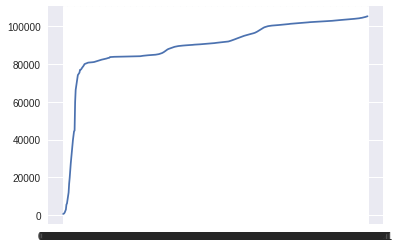

In [21]:
plt.plot(future_forcast_dates, china_cases)

In [22]:
len(future_forcast_dates)

561

In [23]:
len(china_cases)

561

In [24]:
type(future_forcast_dates)

list

In [25]:
df = pd.DataFrame(list(zip(future_forcast_dates, china_cases)),columns=['Dates','China_cases'])

In [26]:
df


,Dates,China_cases
0,01/22/2020,548
1,01/23/2020,643
2,01/24/2020,920
3,01/25/2020,1406
4,01/26/2020,2075
...,...,...
556,07/31/2021,105050
557,08/01/2021,105149
558,08/02/2021,105242
559,08/03/2021,105346


In [27]:
type(df)


pandas.core.frame.DataFrame

In [28]:
#df.index.freq='MS'


In [29]:
df = df.set_index('Dates')

In [30]:
df = df.iloc[50: ,:]

In [31]:
df.size

511

In [32]:
df

,China_cases
Dates,
03/12/2020,80932
03/13/2020,80945
03/14/2020,80977
03/15/2020,81003
03/16/2020,81033
...,...
07/31/2021,105050
08/01/2021,105149
08/02/2021,105242


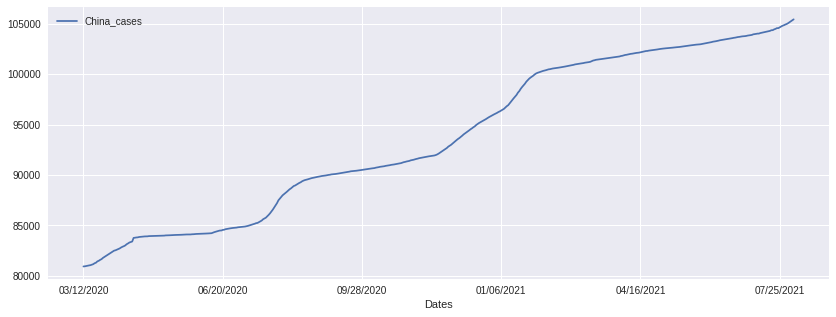

In [33]:
df.plot(figsize=(14,5))

In [34]:
train = df.iloc[:500]
train.head


<bound method NDFrame.head of             China_cases
Dates                  
03/12/2020        80932
03/13/2020        80945
03/14/2020        80977
03/15/2020        81003
03/16/2020        81033
...                 ...
07/20/2021       104362
07/21/2021       104440
07/22/2021       104489
07/23/2021       104563
07/24/2021       104562

[500 rows x 1 columns]>

In [35]:
test = df.iloc[500:]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
dT = df.dtypes
dT

China_cases    int64
dtype: object

In [38]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [39]:


scaled_train




array([[0.00000000e+00],
       [5.50124836e-04],
       [1.90427828e-03],
       [3.00452795e-03],
       [4.27404680e-03],
       [5.33197918e-03],
       [7.19394016e-03],
       [9.47907410e-03],
       [1.34568998e-02],
       [1.57843511e-02],
       [2.12855994e-02],
       [2.37400025e-02],
       [2.77178283e-02],
       [3.07223562e-02],
       [3.59273835e-02],
       [3.97782574e-02],
       [4.36714485e-02],
       [4.76492743e-02],
       [5.10769752e-02],
       [5.55626084e-02],
       [5.92865304e-02],
       [6.27142313e-02],
       [6.62265668e-02],
       [6.77923067e-02],
       [7.03313444e-02],
       [7.33358724e-02],
       [7.55786890e-02],
       [7.94295629e-02],
       [8.25610427e-02],
       [8.50154458e-02],
       [8.81046084e-02],
       [9.31826838e-02],
       [9.65257501e-02],
       [1.00461259e-01],
       [1.02534806e-01],
       [1.04566036e-01],
       [1.19673310e-01],
       [1.20773560e-01],
       [1.21577589e-01],
       [1.22085396e-01],


In [40]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
# define generator
# number of input dates
n_input = 3
# features is 1 because using 1 time series
n_features = 1
#from inputting three dates generate the next date
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [42]:
#used to test the value generator
#change genarator index
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00190428 0.00300453 0.00427405]
Predict this y: 
 [[0.00533198]]


In [43]:


# We do the same thing, but now instead for 12 days
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)



In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [45]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [46]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
488/488 [==============================] - 4s 6ms/step - loss: 0.0131
Epoch 2/10
488/488 [==============================] - 3s 6ms/step - loss: 2.9195e-04
Epoch 3/10
488/488 [==============================] - 3s 7ms/step - loss: 2.1342e-04
Epoch 4/10
488/488 [==============================] - 3s 6ms/step - loss: 6.5934e-04
Epoch 5/10
488/488 [==============================] - 3s 6ms/step - loss: 1.8368e-04
Epoch 6/10
488/488 [==============================] - 3s 6ms/step - loss: 1.6732e-04
Epoch 7/10
488/488 [==============================] - 3s 6ms/step - loss: 1.5397e-04
Epoch 8/10
488/488 [==============================] - 4s 8ms/step - loss: 2.1257e-04
Epoch 9/10
488/488 [==============================] - 3s 6ms/step - loss: 3.7470e-04
Epoch 10/10
488/488 [==============================] - 3s 6ms/step - loss: 1.3217e-04


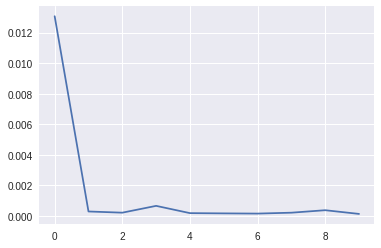

In [48]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [49]:
#get the last train set and perdicting new day value which is in test data set

last_train_batch = scaled_train[-12:]

In [50]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [51]:
#predicting first value from test set
model.predict(last_train_batch)

array([[1.0048388]], dtype=float32)

In [52]:
#real value
scaled_test[0]

array([1.00334307])

In [53]:


test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



In [54]:


test_predictions



[array([1.0048388], dtype=float32),
 array([1.0070752], dtype=float32),
 array([1.0093373], dtype=float32),
 array([1.0117207], dtype=float32),
 array([1.013953], dtype=float32),
 array([1.0161972], dtype=float32),
 array([1.018452], dtype=float32),
 array([1.0206853], dtype=float32),
 array([1.0229454], dtype=float32),
 array([1.0251817], dtype=float32),
 array([1.0274112], dtype=float32)]

In [55]:

#reversde transform to original value number digit format
true_predictions = scaler.inverse_transform(test_predictions)



In [56]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


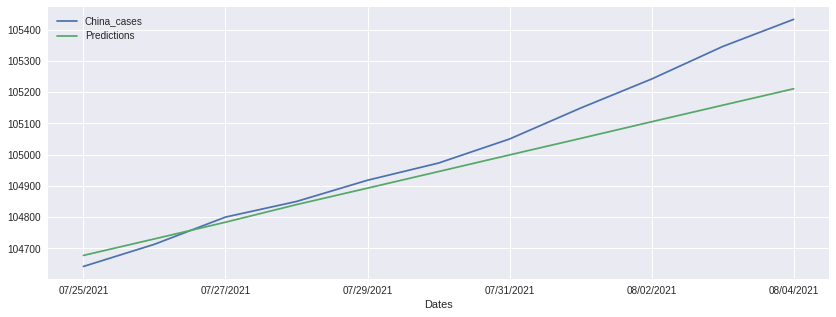

In [57]:
test.plot(figsize=(14,5))

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['China_cases'],test['Predictions']))
print(rmse)

103.90359918695417
